#  DSC540-T302 Data Preparation  #

## Weeks 3 & 4: Understanding Packages##

### Saravanan Janarthanan ###

### Assignment ###

-------------

#### Activity 3.01: Generating Statistics from a CSV File #####

Suppose you are working with the Boston Housing price dataset. This dataset is famous in the machine learning community. Many regression problems can be formulated, and machine learning algorithms can be run on this dataset. You will perform a basic data wrangling activity (including plotting some trends) on this dataset (.csv file) by reading it as a pandas DataFrame. We will perform a few statistical operations on this DataFrame.

In [1]:
#Load the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in the Boston Housing dataset (given as a .csv file) from the local directory.
bostn_housn_df = pd.read_csv("Boston_housing.csv")

In [3]:
#Check the first 10 records. 
bostn_housn_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
#Find the total number of records.
print("Total number of records in the dataframe is", bostn_housn_df.size)

Total number of records in the dataframe is 7084


In [5]:
'''
Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT:
Chas: Charlse River Dummy variable

Nox: Nitric Oxide concentration

B: Proportion of the population that is African American

LSTAT: Percentage of lower-income population
'''

ref_housn_df = bostn_housn_df.drop(columns=['CHAS', 'NOX', 'B', 'LSTAT'] )

In [6]:
#Check the last seven records of the new DataFrame you just created.
ref_housn_df.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


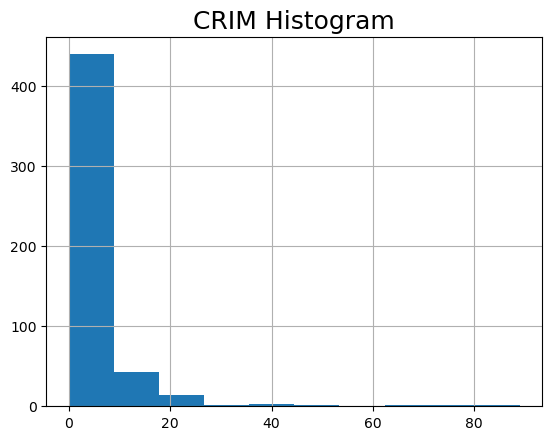

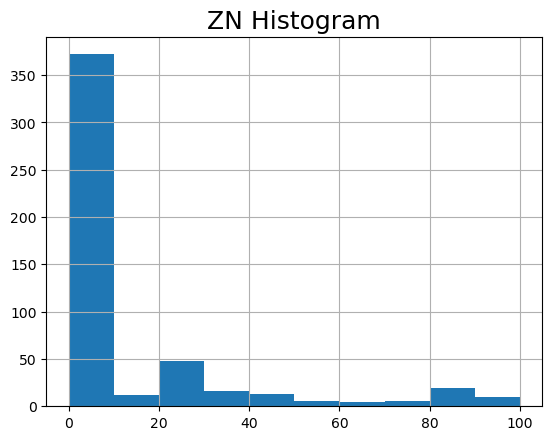

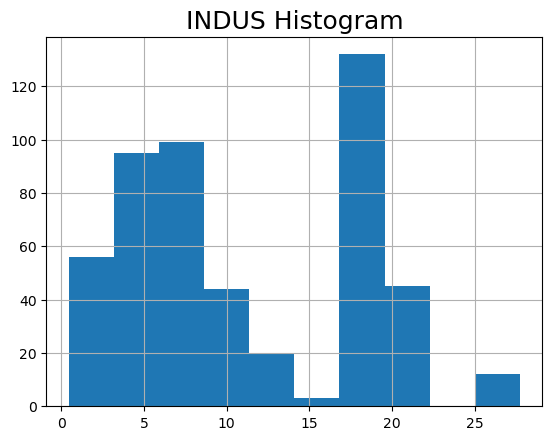

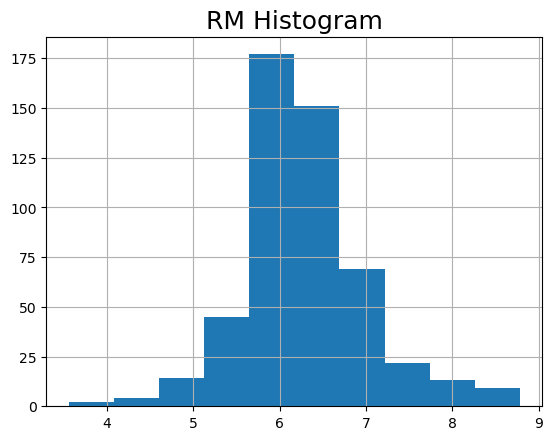

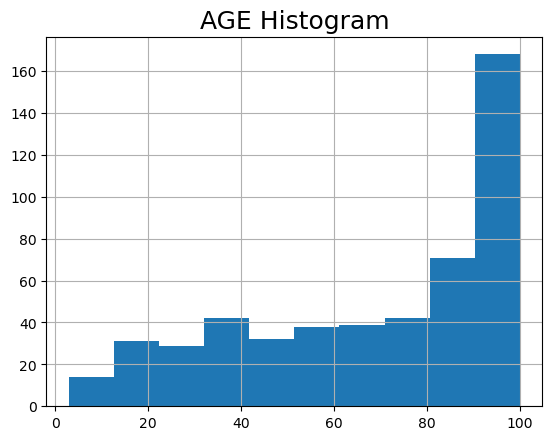

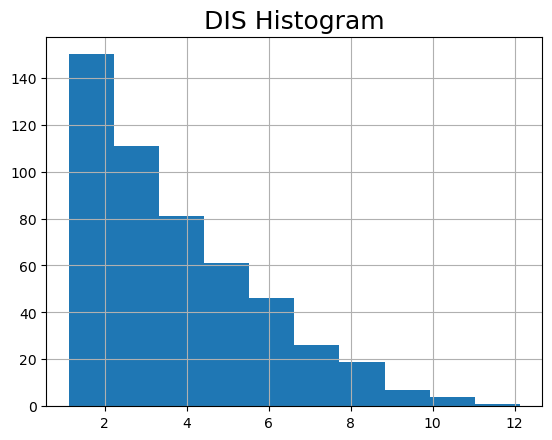

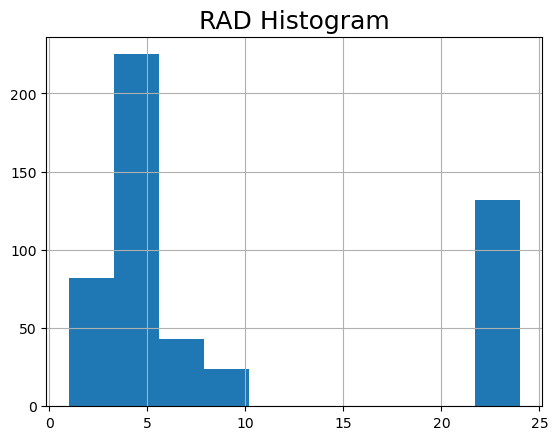

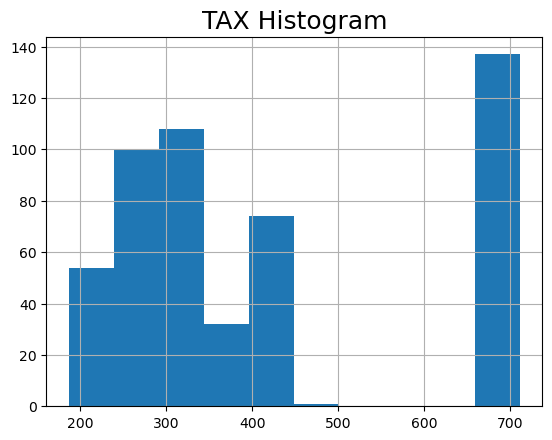

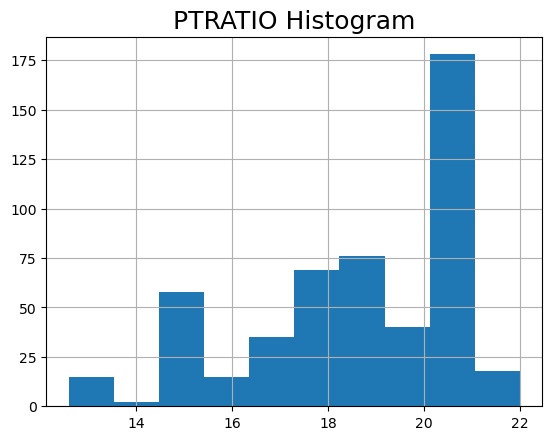

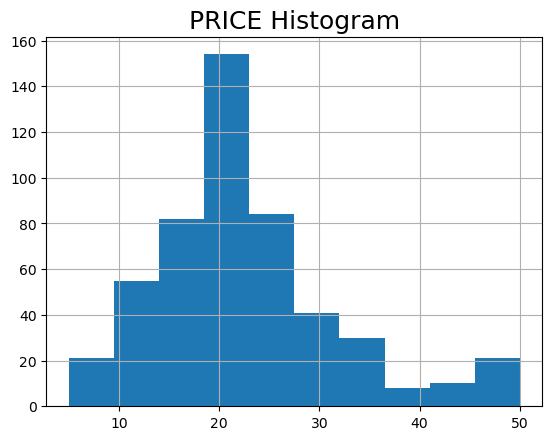

In [7]:
#Plot the histograms of all the variables (columns) in the new DataFrame.
#Plot them all at once using a for loop. Try to add a unique title to the plot.
#figure, axis = plt.subplots(5, 2) 
for colname in ref_housn_df:
    ref_housn_df[colname].hist()
    plt.grid(True)
    plt.title( colname +  " Histogram",fontsize=18)
    plt.show()

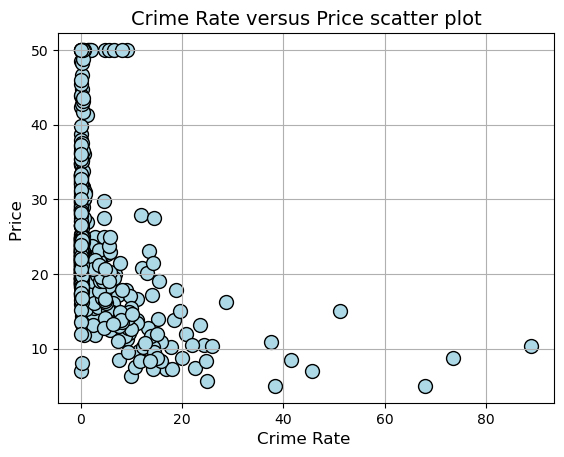

In [8]:
# Create a scatter plot of crime rate versus price.
ref_housn_df.plot.scatter('CRIM','PRICE',s=100, c='lightblue',edgecolor='k')

plt.grid(True)

plt.title("Crime Rate versus Price scatter plot",fontsize=14)

plt.xlabel("Crime Rate ",fontsize=12)

plt.ylabel("Price ",fontsize=12)

plt.show()

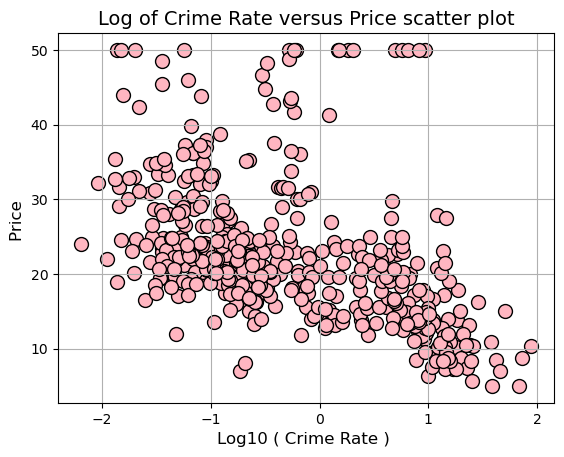

In [9]:
# Plot log10(crime) versus price.


plt.scatter(np.log10(ref_housn_df['CRIM']),   ref_housn_df['PRICE'],s=100, c='lightpink',edgecolor='k')

plt.grid(True)

plt.title("Log of Crime Rate versus Price scatter plot",fontsize=14)

plt.xlabel("Log10 ( Crime Rate ) ",fontsize=12)

plt.ylabel("Price ",fontsize=12)

plt.show()

In [10]:
# Calculate some useful statistics, such as 
# mean rooms per dwelling, median age, mean distances to five Boston employment centers, and 
# the percentage of houses with a low price (< $20,000).

In [48]:


# Mean rooms per dwelling
print("Mean rooms per dwelling : {:.2f}".format(ref_housn_df['RM'].mean()))

Mean rooms per dwelling : 6.28


In [13]:
# Median age
print("Median Age across  : ", ref_housn_df['AGE'].median())

Median Age across  :  77.5


In [14]:
# Mean distances to five Boston employment centers
print("Mean distance to five Boston employment centers  : {:.2f} miles".format( ref_housn_df['DIS'].mean()))

Mean distance to five Boston employment centers  : 3.80 miles


In [15]:
# percentage of houses with a low price (< $20,000)
# Since the price is listed in 1000s  hence number of house with price less then 20 is used
percent_Less_20 = len(ref_housn_df[ref_housn_df['PRICE'] < 20.0]) *100 / len(ref_housn_df)
print("Percentage of houses with a low price i.e < $20000 is {:.2f}%".format(percent_Less_20))

Percentage of houses with a low price i.e < $20000 is 41.50%


-----

#### Activity 4.01: Working with the Adult Income Dataset (UCI) ####

In this activity, we will detect outliers in the Adult Income Dataset from the UCI machine learning portal 

use the concepts such as subsetting, applying user-defined functions, summary statistics, visualizations, boolean indexing, and group by to find a whole group of outliers in a dataset. create a bar plot to plot this group of outliers. Finally,  merge two datasets by using a common key.

In [16]:
# Read the adult income dataset 
adlt_incm_df = pd.read_csv("adult_income_data.csv")

In [17]:
adlt_incm_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [18]:
'''
Create a script that will read a text file line by line.
Add a name of Income for the response variable to the dataset.
Find the missing values.
Create a DataFrame with only age, education, and occupation by using subsetting.
Plot a histogram of age with a bin size of 20.
Create a function to strip the whitespace characters.
Use the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.
Find the number of people who are aged between 30 and 50.
Group the records based on age and education to find how the mean age is distributed.
Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile.
Use subset and groupBy to find the outliers.
Plot the outlier values on a bar chart. It should look something like this:
'''

'\nCreate a script that will read a text file line by line.\nAdd a name of Income for the response variable to the dataset.\nFind the missing values.\nCreate a DataFrame with only age, education, and occupation by using subsetting.\nPlot a histogram of age with a bin size of 20.\nCreate a function to strip the whitespace characters.\nUse the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.\nFind the number of people who are aged between 30 and 50.\nGroup the records based on age and education to find how the mean age is distributed.\nGroup by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile.\nUse subset and groupBy to find the outliers.\nPlot the outlier values on a bar chart. It should look something like this:\n'

In [19]:
#Create a script that will read a text file line by line.

ftr_nm = []

with open('adult_income_names.txt') as file:
    for line in file:
        file.readline() # to skip end of line escape character
        ftr_nm.append(line.split(":")[0])
        

print(ftr_nm)



['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [20]:
# Add a name of Income for the response variable to the dataset.
ftr_nm.append("Income")

adlt_incm_df = pd.read_csv("adult_income_data.csv", names=ftr_nm)
adlt_incm_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [21]:
# Find the missing values.
adlt_incm_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

**There are no blank values as count is all zero**

In [22]:
# print the unique values and their count in each column to find any odd values or special characters (only categorical)
for colmn in adlt_incm_df:
    print(adlt_incm_df[colmn].value_counts())

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: count, Length: 21648, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51


**3 features, "workclass", "occupation" and "native-country" has odd values**

- workclass has 1836 odd values
- occupation has 1843 odd values
- native-country has 583 odd values

In [23]:
# Create a DataFrame with only age, education, and occupation by using subsetting.
adlt_incm_df_subset = adlt_incm_df[['age','education','occupation']]

In [24]:
adlt_incm_df_subset.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


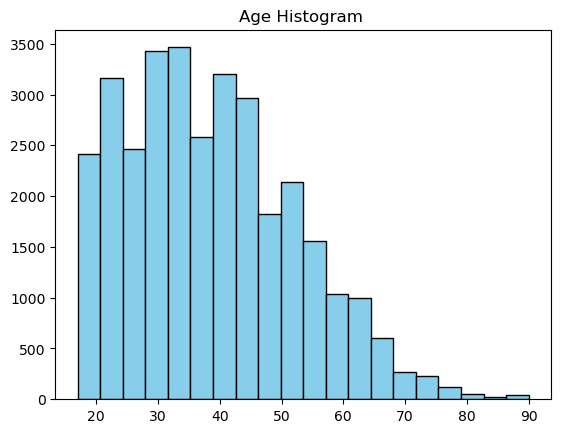

In [25]:
# Plot a histogram of age with a bin size of 20.
plt.hist(adlt_incm_df_subset['age'], bins=20, color='skyblue', edgecolor="black") 
plt.title("Age Histogram ")


plt.show()

In [26]:
adlt_incm_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [27]:
# Create a function to strip the whitespace characters.
def stripwhiteSpace(str_input):
    return str_input.strip()





In [28]:
adlt_incm_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [29]:
# Use the apply method to apply this function to all the columns with string values, 
# create a new column, copy the values from this new column to the old column, and 
# drop the new column.
adlt_incm_df.head()


        
    

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [30]:
for colnm in adlt_incm_df:
    if adlt_incm_df[colnm].dtype == "object":
        newcolnm = colnm + "_newcol"
        adlt_incm_df[newcolnm] = adlt_incm_df[colnm].apply(lambda x: stripwhiteSpace(x))
        adlt_incm_df[colnm] = adlt_incm_df[newcolnm]
        adlt_incm_df.drop(columns=[newcolnm], inplace=True)

In [31]:
# Find the number of people who are aged between 30 and 50.
age_30_to_50 = adlt_incm_df[adlt_incm_df['age'].between(30, 50)].shape[0]
print(" Number of people who are aged between 30 and 50 is  ", age_30_to_50)

 Number of people who are aged between 30 and 50 is   16390


In [32]:
# Group the records based on age and education to find how the mean age is distributed.
edu_age = adlt_incm_df_subset.groupby('education').describe()['age']
print(edu_age)

                 count       mean        std   min    25%   50%   75%   max
education                                                                  
 10th            933.0  37.429796  16.720713  17.0  22.00  34.0  52.0  90.0
 11th           1175.0  32.355745  15.545485  17.0  18.00  28.0  43.0  90.0
 12th            433.0  32.000000  14.334625  17.0  19.00  28.0  41.0  79.0
 1st-4th         168.0  46.142857  15.615625  19.0  33.00  46.0  57.0  90.0
 5th-6th         333.0  42.885886  15.557285  17.0  29.00  42.0  54.0  84.0
 7th-8th         646.0  48.445820  16.092350  17.0  34.25  50.0  61.0  90.0
 9th             514.0  41.060311  15.946862  17.0  28.00  39.0  54.0  90.0
 Assoc-acdm     1067.0  37.381443  11.095177  19.0  29.00  36.0  44.0  90.0
 Assoc-voc      1382.0  38.553546  11.631300  19.0  30.00  37.0  46.0  84.0
 Bachelors      5355.0  38.904949  11.912210  19.0  29.00  37.0  46.0  90.0
 Doctorate       413.0  47.702179  11.784716  24.0  39.00  47.0  55.0  80.0
 HS-grad    

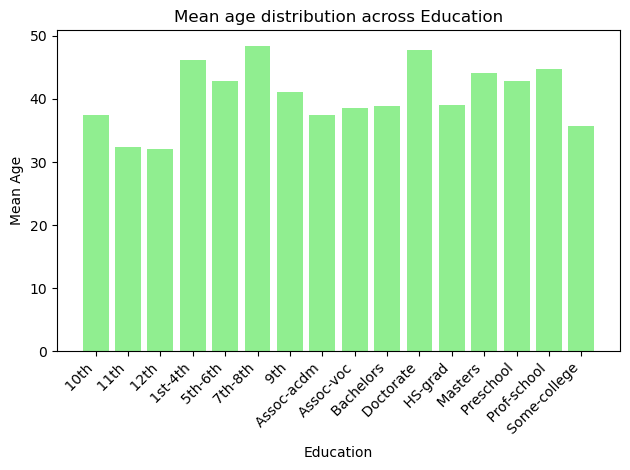

In [33]:
plt.bar(edu_age.index,   edu_age['mean'],  color='lightgreen')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
plt.xlabel('Education')
plt.ylabel('Mean Age')
#plt.grid(True)
plt.title('Mean age distribution across Education')
plt.tight_layout() 
plt.show()

In [34]:
# Group by occupation and show the summary statistics of age. 
# Find which profession has the oldest workers on average and which profession has its largest share of the workforce 
# above the 75th percentile.
occp_age = adlt_incm_df_subset.groupby('occupation').describe()['age']

In [35]:
occp_age

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [36]:
#for mean_age in occp_age['mean']

new_index = occp_age.index.tolist() 
new_index[0] = 'unknown'  # Replace the first index label
occp_age.index = new_index 

occp_age

,count,mean,std,min,25%,50%,75%,max
unknown,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0
Priv-house-serv,149.0,41.724832,18.633688,17.0,24.0,40.0,57.0,81.0


In [37]:
# oldest workers on average based on mean age
oldest_mean_age = max(occp_age['mean'])
oldest_mean_age_list = occp_age['mean'].tolist()
old_wrkr_occuptn = new_index[ oldest_mean_age_list.index(max(oldest_mean_age_list) ) ]
print("Profession " ,old_wrkr_occuptn , " has oldest workers on average with a mean age of {:.2f}".format(oldest_mean_age) )

Profession   Exec-managerial  has oldest workers on average with a mean age of 42.17


In [38]:
# oldest workers on average based on mean age weighted by count
rec_count = len(adlt_incm_df_subset)
occp_age['weight_avg_age'] = occp_age['mean'] * occp_age['count'] / rec_count 
weight_mean_age = occp_age['weight_avg_age'].tolist()

#print(weight_mean_age)
old_wrkr_occuptn = new_index[ weight_mean_age.index(max(weight_mean_age) ) ] 
print("Profession " ,old_wrkr_occuptn , " has oldest workers with weighted average of mean age of {:.2f}".format(max(weight_mean_age)) )

Profession   Exec-managerial  has oldest workers with weighted average of mean age of 5.27


In [40]:
# which profession has its largest share of the workforce above the 75th percentile
occp_age_grp = adlt_incm_df_subset.groupby('occupation')['age']
# find the 75 percentile value for each occupation
percentile_75 = occp_age_grp.quantile(0.75)

# Iterate through each group of occupation and find the count of  rcords that has value above 75th percentile of its 
# respective occupation group
counts_above_75th_percentile = adlt_incm_df_subset.groupby('occupation')['age'].apply(lambda x: (x > percentile_75[x.name]).sum())
# use the idxmax function to find the occupation that has max count value
print("Profession " ,counts_above_75th_percentile.idxmax() , " has largest  workers bove the 75th percentile")

Profession   Prof-specialty  has largest  workers bove the 75th percentile


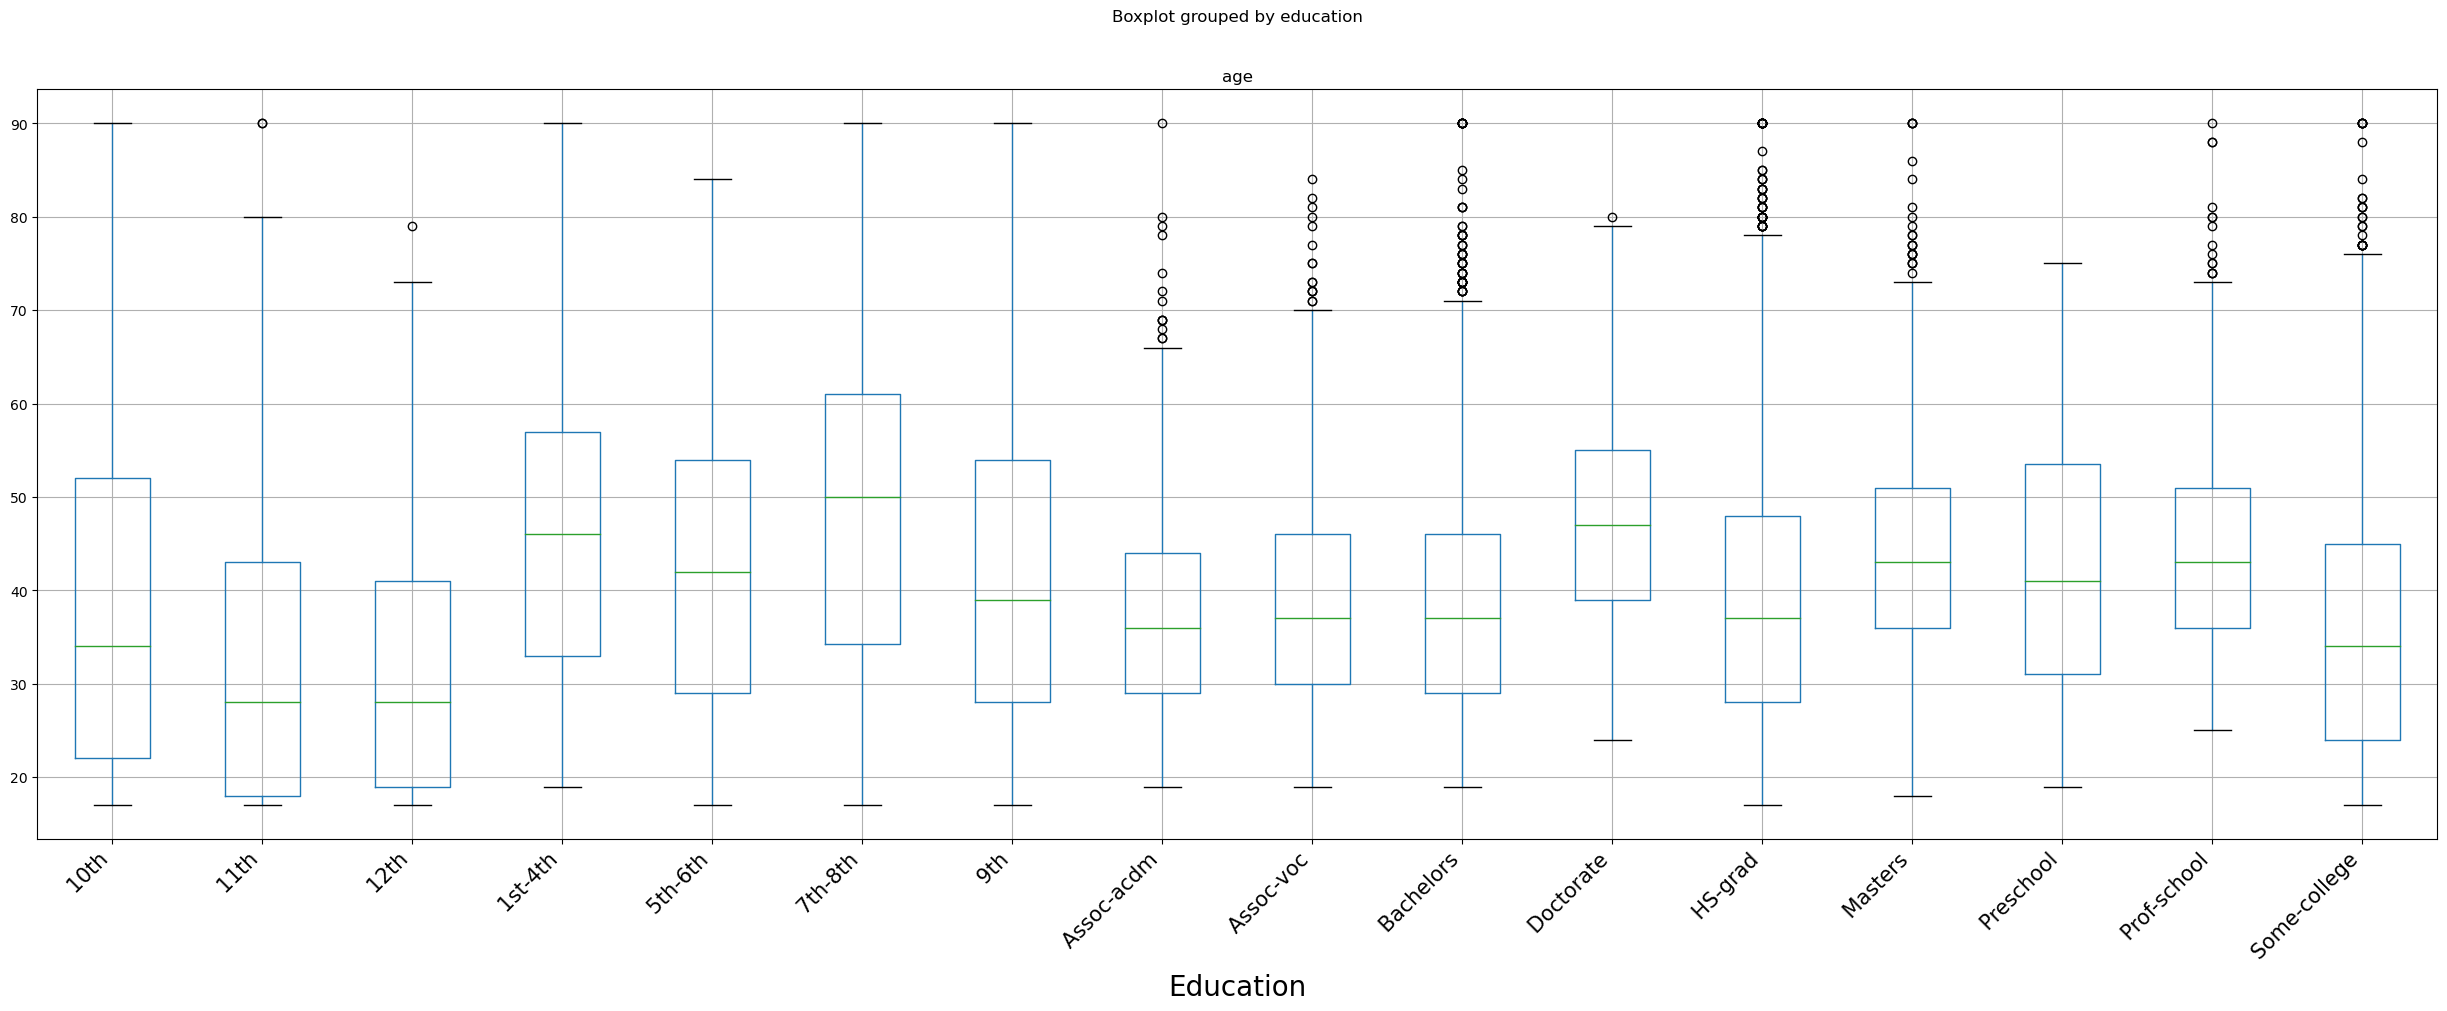

In [41]:
adlt_incm_df_subset.boxplot(column='age',by='education',figsize=(30,10))

plt.xticks(fontsize=15, rotation=45, ha='right')

plt.xlabel("Education",fontsize=20)

plt.show()

In [42]:
# Define a function to calculate 1.5*IQR  and add q3 to find value theoritical max value
def find_1_5_iq_max_valuer(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return Q3+1.5 * IQR

In [43]:
# find the max value of each group by assuming standard 1.5 internal qunatile IQR value

q3_plus_1_5_IQR_thresholds = adlt_incm_df_subset.groupby('occupation')['age'].apply(find_1_5_iq_max_valuer)

In [44]:
# Any values aobve the 75th qunatile + 1.5 IQR value is considered as outlier and those records are grouped
counts_of_outliers = adlt_incm_df_subset.groupby('occupation')['age'].apply(lambda x: (x > q3_plus_1_5_IQR_thresholds[x.name]).sum())

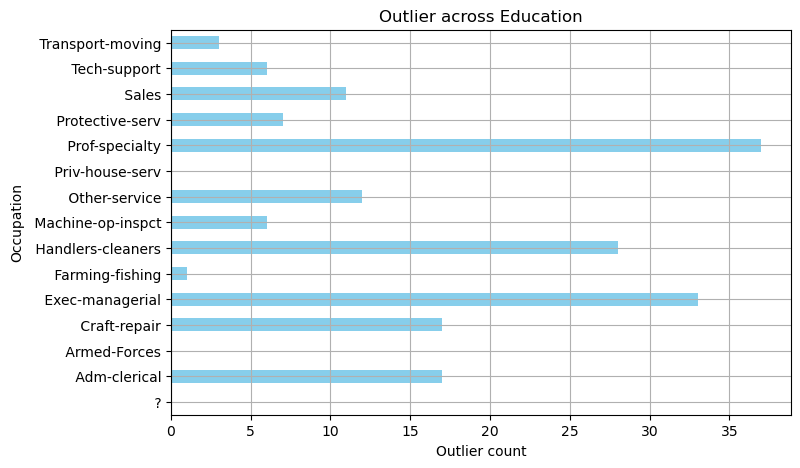

In [45]:
# use the series plot function to build the horizontal bar chart
counts_of_outliers.plot(kind='barh', color='skyblue', figsize=(8, 5))

# Adding labels and title
plt.grid(True)
plt.xlabel('Outlier count')
plt.ylabel('Occupation')
plt.title('Outlier across Education')

plt.show()

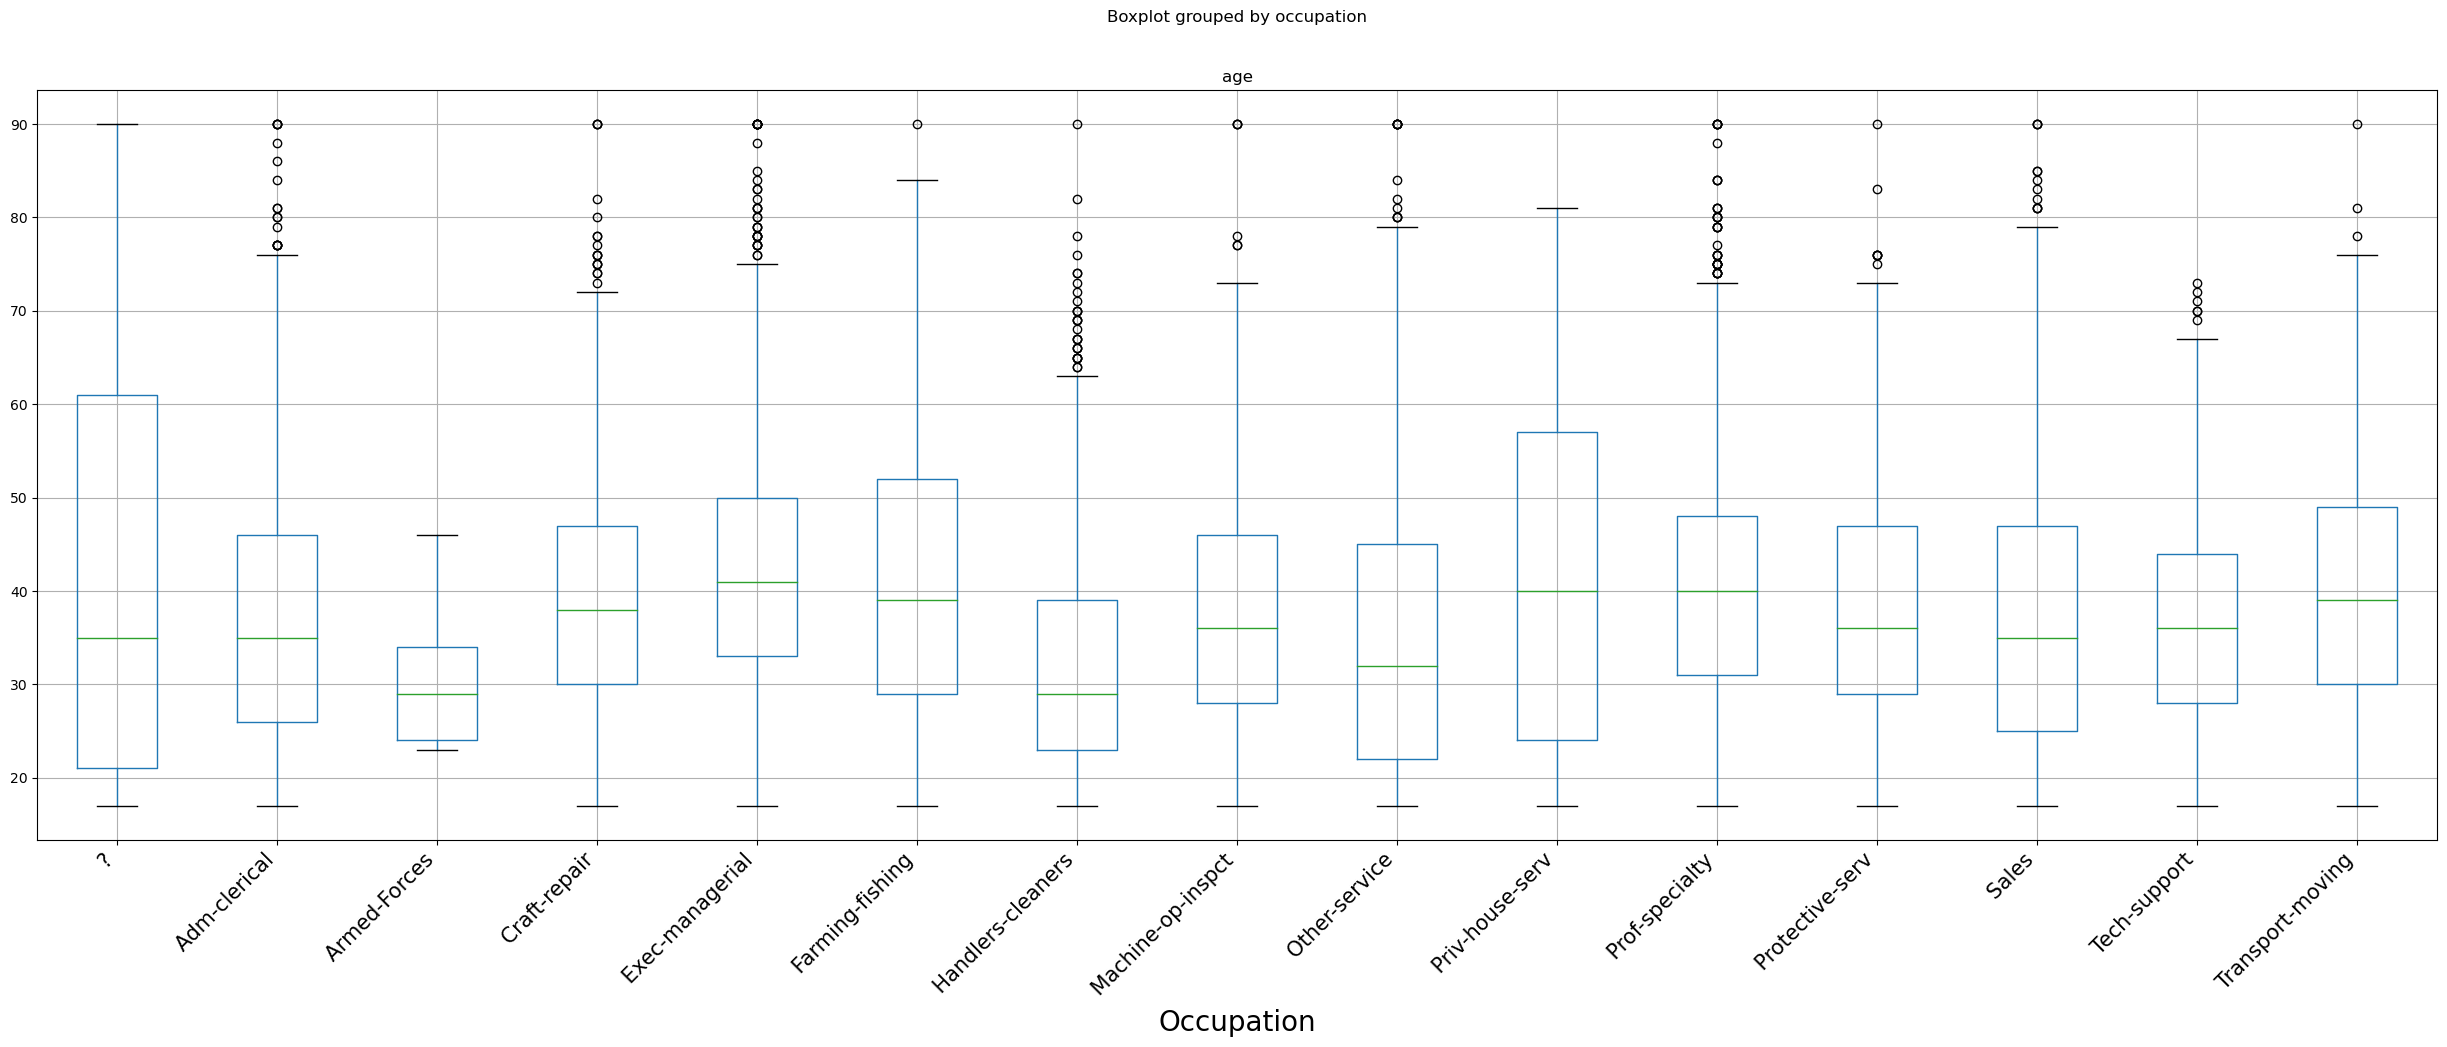

In [46]:
adlt_incm_df_subset.boxplot(column='age',by='occupation',figsize=(30,10))

plt.xticks(fontsize=15, rotation=45, ha='right')

plt.xlabel("Occupation",fontsize=20)

plt.show()

**Cross verifying the box plot and bar chart it is evident that ?(unknown), 'Armed-Forces' and 'Priv-house-serv' occupations have no outliers**

------

Create a series and practice basic arithmetic steps

a. Series 1 = 7.3, -2.5, 3.4, 1.5

i. Index = ‘a’, ‘c’, ‘d’, ‘e’

b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1

i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’

c. Add Series 1 and Series 2 together and print the results

d. Subtract Series 1 from Series 2 and print the results


In [49]:
series_1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
series_2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [64]:
# Add series using + operator
reslt_1= series_1 + series_2
print("Adding 2 series using + operator")
print(reslt_1)

Adding 2 series
a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [65]:
# Add series using add() function  
reslt_2 = series_1.add(series_2)
print("Adding 2 series using add() function")
print(reslt_2)

Adding 2 series using add() function
a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [66]:
# Add series using add() and function  and fill missing values with 0
reslt_3 = series_1.add(series_2, fill_value=0)
print("Adding 2 series using add() function after filling missing pair index value with zero")
print(reslt_3)

Adding 2 series using add() function after filling missing pair index value with zero
a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64


In [67]:
# Add series using + operator
reslt_4= series_1 - series_2
print("subtracting series 2 from seies 1 using - operator")
print(reslt_4)

subtracting series 2 from seies 1 using - operator
a    9.4
c   -6.1
d    NaN
e    3.0
f    NaN
g    NaN
dtype: float64


In [68]:
# Add series using sub() function  
reslt_5 = series_1.sub(series_2)
print("Adding 2 series using add() function")
print(reslt_5)

Adding 2 series using add() function
a    9.4
c   -6.1
d    NaN
e    3.0
f    NaN
g    NaN
dtype: float64


In [69]:
# Add series using add() and function  and fill missing values with 0
reslt_6 = series_1.sub(series_2, fill_value=0)
print("Adding 2 series using add() function after filling missing pair index value with zero")
print(reslt_6)

Adding 2 series using add() function after filling missing pair index value with zero
a    9.4
c   -6.1
d    3.4
e    3.0
f   -4.0
g   -3.1
dtype: float64
